## Demonstration of Monte Carlo simulation for subsurface uncertainty modeling workflows. This should help you get started with building subsurface models that integrate uncertainty sources.

# Monte Carlo Simulation
## Definition: random sampling from a distribution





## Monte Carlo Simulation (MCS) is extremely powerful

### Possible to easily simulate uncertainty models for complicated systems
## Simulations are conducted by drawing values at random from specified uncertainty distributions for each variable
## A single realization of each variable, A,h,POR,Bo,Swi is applied to the transfer function to calculate the realization of the variable of interest, OOIP (output, decision criteria):

### The GeostatsPy Package brings GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functions to Python. GSLIB is extremely robust and practical set of code for building spatial modeling workflows.

### geostatspy.geostats includes GSLIB functions rewritten in Python. This currently includes all the variogram, distribution transformations, and spatial estimation and simulation (SGSIM soon) methods. I will continue adding functions to support modeling operations for practical subsurface model cosntruction.

### geostatspy.GSLIB includes reimplimentation of the GSLIB visualizations and low tech wrappers of the numerical methods (note: the low-tech wrapper require access to GSLIB executables).

In [4]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trig etc.
import random

## About the data- Data contains basic parameters reqd. to calculate OOIP 

#### A-Area
#### POR-porosity
#### h-height
#### B0- oil fvf
#### Swi-water saturation


In [5]:
#reading the file
df=pd.read_excel(r"C:\Users\Hp\Documents\MCS.xlsx")
df.head(10)

,A,POR,Swi,Bo,h
0,490,15,17,1.105,90
1,490,16,17,1.105,90
2,490,16,18,1.106,90
3,490,17,18,1.106,90
4,490,17,20,1.106,90
5,500,17,20,1.106,100
6,500,18,22,1.106,100
7,500,18,22,1.106,100
8,500,18,22,1.106,100
9,500,18,22,1.107,100


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A,19.0,499.473684,7.050362,490.000,495.000,500.000,500.000,510.000
POR,19.0,17.736842,1.194529,15.000,17.000,18.000,18.000,20.000
Swi,19.0,21.368421,2.454260,17.000,20.000,22.000,22.000,25.000
Bo,19.0,1.106579,0.000902,1.105,1.106,1.107,1.107,1.108
h,19.0,99.473684,7.050362,90.000,95.000,100.000,100.000,110.000


In [7]:
por_mean=df['POR'].mean()
por_stddev=df['POR'].std()
print(por_mean)
print(por_stddev)

17.736842105263158
1.1945294407402949


## In this step we run our variables a large no. of times (realizations) and finally visualize their normal distribution
## This is where the Monte Carlo Simulation technique comes into play.

In [9]:
L=500   # no. of realizations
apor = np.random.normal(por_mean, por_stddev, size=L) # average porosity MCS simulation L times and store in array 
Swi= np.random.uniform(df['Swi'].min(), df['Swi'].max(), size=L)         # saturation oil
h=np.random.normal(df['h'].mean(), df['h'].std(), size=L) # average height MCS simulation L times and store in array
A=np.random.normal(df['A'].mean(), df['A'].std(), size=L) # average area MCS simulation L times and store in array
Bo=np.random.normal(df['Bo'].mean(), df['Bo'].std(), size=L) # average fvf MCS simulation L times and store in array

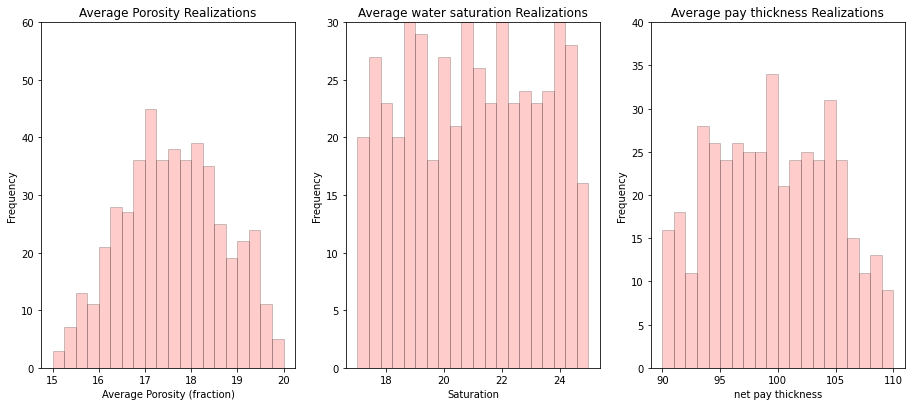

In [10]:
plt.subplot(131)
GSLIB.hist_st(apor,df['POR'].min(),df['POR'].max(),log=False,cumul=False,bins=20,weights=None,xlabel="Average Porosity (fraction)",title="Average Porosity Realizations")
plt.ylim(0.0,60)

plt.subplot(132)
GSLIB.hist_st(Swi,df['Swi'].min(),df['Swi'].max(),log=False,cumul=False,bins=20,weights=None,xlabel="Saturation",title="Average water saturation Realizations")
plt.ylim(0.0,30)

plt.subplot(133)
GSLIB.hist_st(h,df['h'].min(),df['h'].max(),log=False,cumul=False,bins=20,weights=None,xlabel="net pay thickness",title="Average pay thickness Realizations")
plt.ylim(0.0,40)



plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

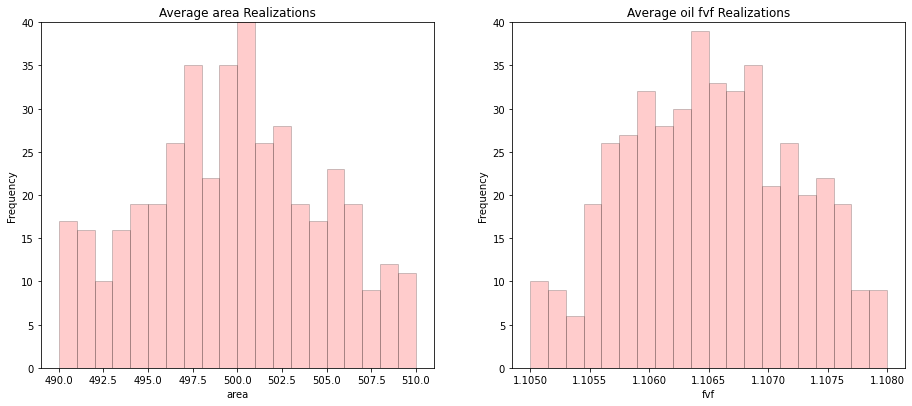

In [11]:
plt.subplot(121)
GSLIB.hist_st(A,df['A'].min(),df['A'].max(),log=False,cumul=False,bins=20,weights=None,xlabel="area",title="Average area Realizations")
plt.ylim(0.0,40)

plt.subplot(122)
GSLIB.hist_st(Bo,df['Bo'].min(),df['Bo'].max(),log=False,cumul=False,bins=20,weights=None,xlabel="fvf",title="Average oil fvf Realizations")
plt.ylim(0.0,40)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

## We check our o/p i.e. OOIP and visualize the distribution over L realizations

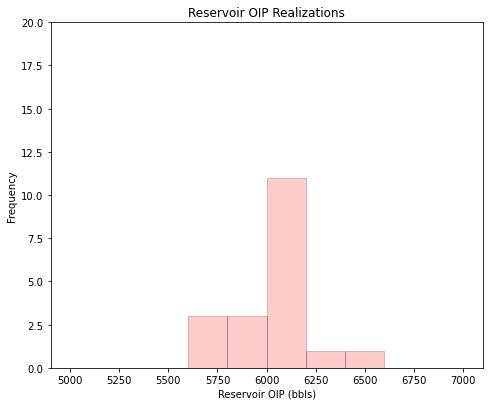

In [15]:
OIP = 7758*(df['A']*(df['POR']/100)*df['Bo']*(1-df['Swi']/100))/(df['h'])
plt.subplot(111)
GSLIB.hist_st(OIP,5000,7000,log=False,cumul=False,bins=10,weights=None,xlabel="Reservoir OIP (bbls)",title="Reservoir OIP Realizations")
plt.ylim(0.0,20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()


## We check our o/p and run the simulation for smaller no. of realizations to see the changes, if any.

In [16]:
L = 100                                                # set L small 
# First set of realizations
apor = np.random.normal(por_mean, por_stddev, size=L) # average porosity MCS simulation L times and store in array 
Swi= np.random.uniform(df['Swi'].min(), df['Swi'].max(), size=L)         # saturation oil
h=np.random.normal(df['h'].mean(), df['h'].std(), size=L) # average height MCS simulation L times and store in array
A=np.random.normal(df['A'].mean(), df['A'].std(), size=L) # average area MCS simulation L times and store in array
Bo=np.random.normal(df['Bo'].mean(), df['Bo'].std(), size=L) # average fvf MCS simulation L times and store in array
OIP1 = 7758*(df['A']*(df['POR']/100)*df['Bo']*(1-df['Swi']/100))/(df['h'])
# Second set of realizations
L=300
apor = np.random.normal(por_mean, por_stddev, size=L) # average porosity MCS simulation L times and store in array 
Swi= np.random.uniform(df['Swi'].min(), df['Swi'].max(), size=L)         # saturation oil
h=np.random.normal(df['h'].mean(), df['h'].std(), size=L) # average height MCS simulation L times and store in array
A=np.random.normal(df['A'].mean(), df['A'].std(), size=L) # average area MCS simulation L times and store in array
Bo=np.random.normal(df['Bo'].mean(), df['Bo'].std(), size=L) # average fvf MCS simulation L times and store in array
OIP2 = 7758*(df['A']*(df['POR']/100)*df['Bo']*(1-df['Swi']/100))/(df['h'])

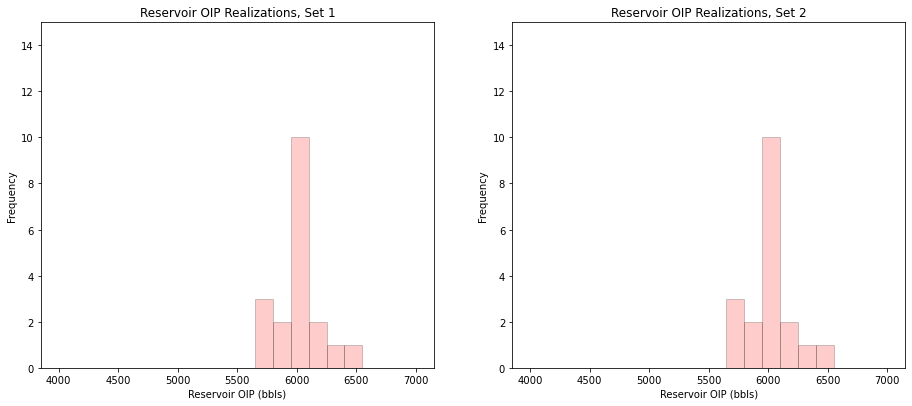

In [17]:
plt.subplot(121)
GSLIB.hist_st(OIP1,4000,7000,log=False,cumul=False,bins=20,weights=None,xlabel="Reservoir OIP (bbls)",title="Reservoir OIP Realizations, Set 1")
plt.ylim(0.0,15)

plt.subplot(122)
GSLIB.hist_st(OIP2,4000,7000,log=False,cumul=False,bins=20,weights=None,xlabel="Reservoir OIP (bbls)",title="Reservoir OIP Realizations, Set 2")
plt.ylim(0.0,15)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [18]:
print('The average OIP for large number of realizations = ' + str(round(np.average(OIP),3)))
print('The average OIP for small number of realizations = ' + str(round(np.average(OIP1),3)) + ', ' + str(round(np.average(OIP2),3))) 

The average OIP for large number of realizations = 6012.789
The average OIP for small number of realizations = 6012.789, 6012.789


## It is seen that the the OOIP remains same maybe because of small dataset. 